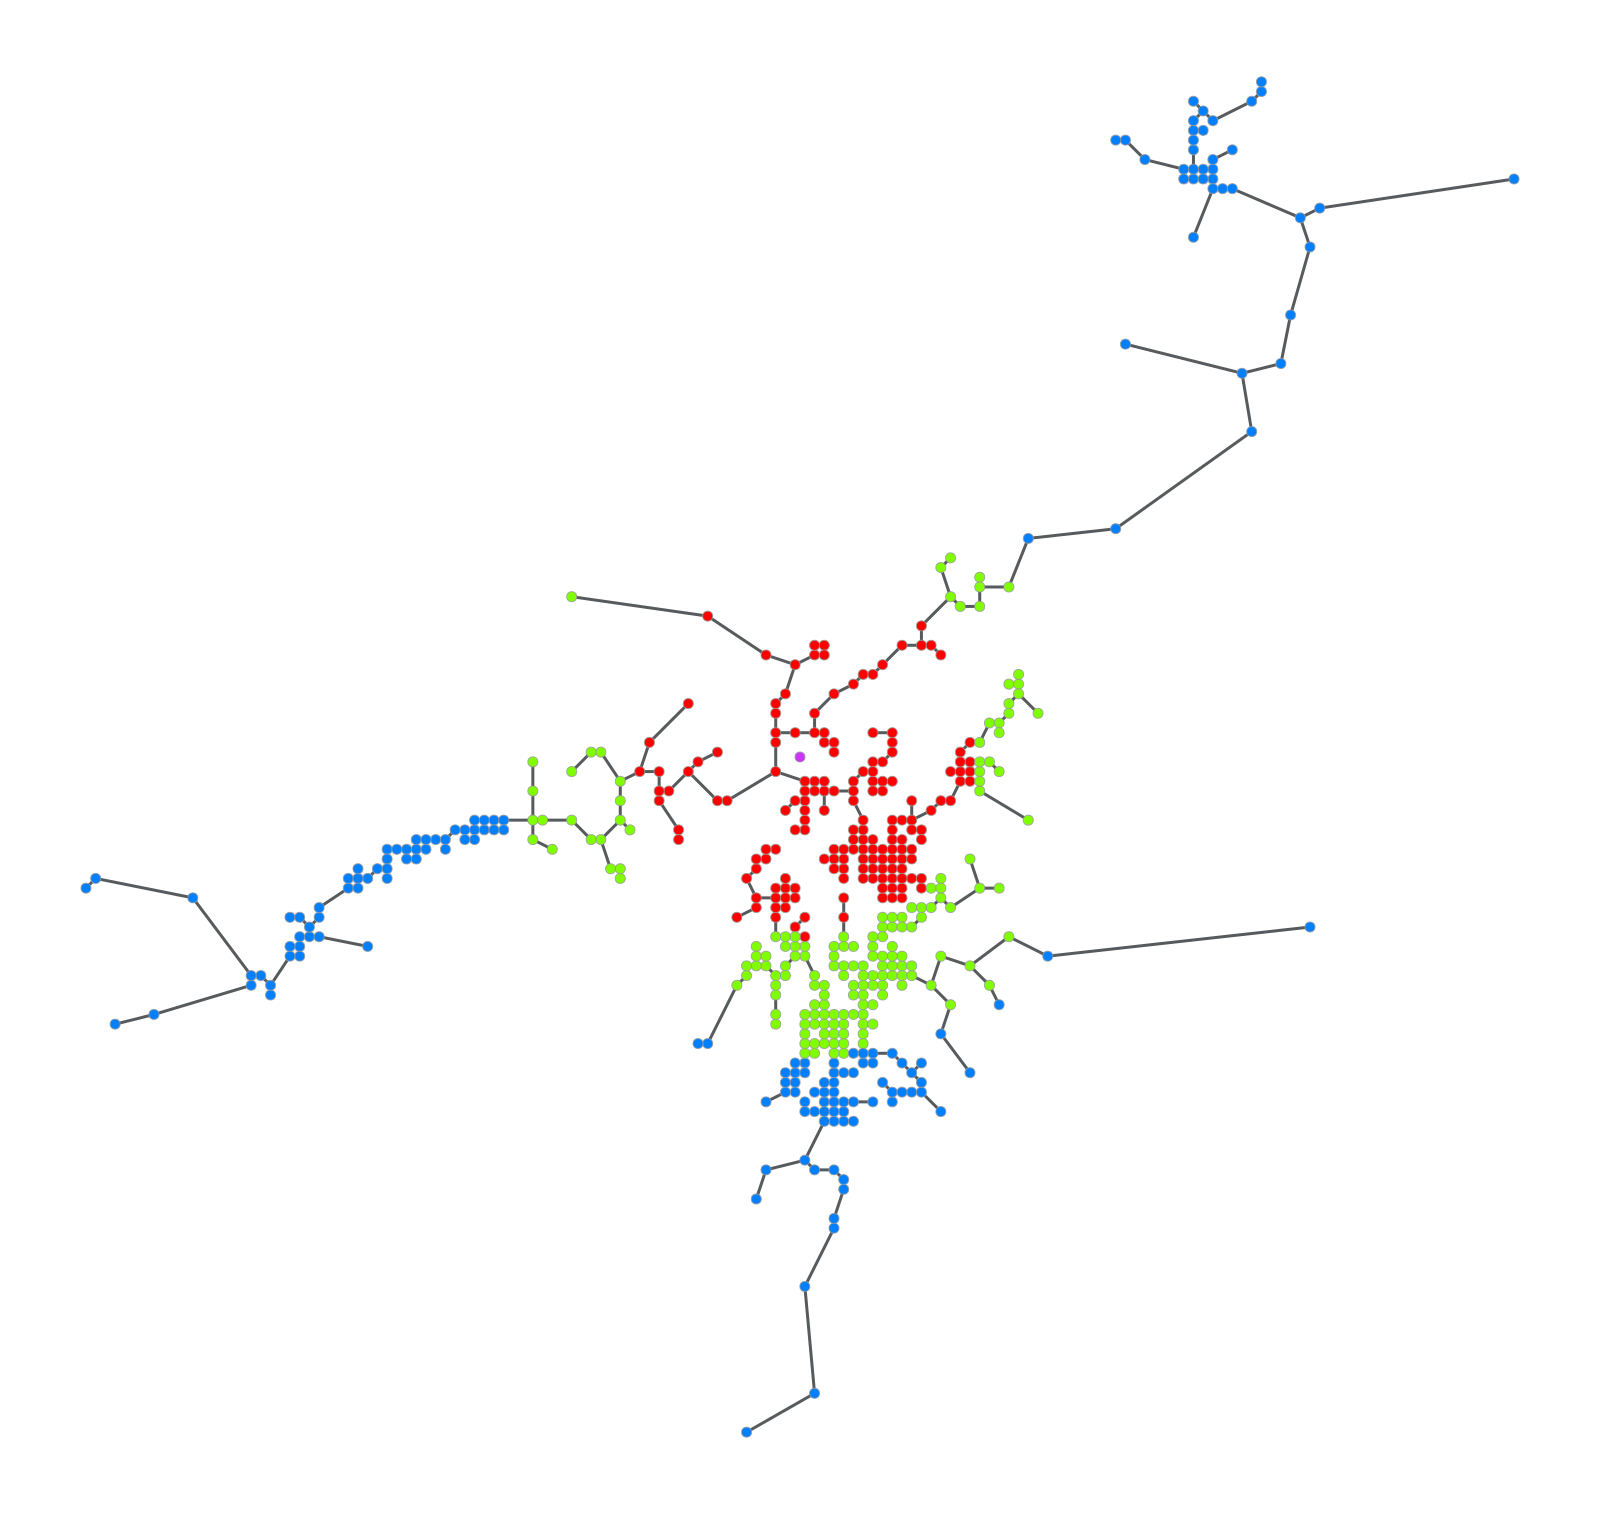

In [4]:
import numpy as np
import graph_tool.all as gt
import python_codes.files_operators as fo
import matplotlib.pyplot as plt

# 读取图数据
read_graph, read_pos = fo.read_files("./networks_date/2keihan2_pop_500_mst.net", False)

# 创建并赋值位置属性，确保数据为 float
pos = read_graph.new_vertex_property("vector<double>")
positions = []

for v in read_graph.vertices():
    coords = read_pos[v]
    coords_float = [float(coords[0]), float(coords[1])]  # 强制转换为 float
    pos[v] = coords_float
    positions.append(coords_float)

positions = np.array(positions, dtype=np.float64)  # 确保是 numpy float 数组

# 计算 Bounding Box 圆心
X_max, Y_max = np.max(positions, axis=0)
X_min, Y_min = np.min(positions, axis=0)
center_x, center_y = (X_max + X_min) / 2, (Y_max + Y_min) / 2

# 计算节点到圆心的距离并排序
distances = np.linalg.norm(positions - np.array([center_x, center_y]), axis=1)
sorted_indices = np.argsort(distances)
num_nodes = len(positions)

# 节点分三个环
node_layers = np.zeros(num_nodes, dtype=int)
for idx, node_idx in enumerate(sorted_indices):
    if idx < num_nodes / 3:
        node_layers[node_idx] = 1
    elif idx < 2 * num_nodes / 3:
        node_layers[node_idx] = 2
    else:
        node_layers[node_idx] = 3

# 创建节点颜色属性
layer_prop = read_graph.new_vertex_property("int")
for idx, layer in enumerate(node_layers):
    layer_prop[read_graph.vertex(idx)] = layer

# 映射颜色
color_map = {1: (1, 0, 0, 1), 2: (0.5, 1, 0, 1), 3: (0, 0.5, 1, 1)}  # 颜色需为 RGBA 格式
vertex_colors = read_graph.new_vertex_property("vector<double>")

for v in read_graph.vertices():
    vertex_colors[v] = color_map[layer_prop[v]]

# 标记圆心点
center_vertex_color = read_graph.new_vertex_property("vector<double>")
for v in read_graph.vertices():
    center_vertex_color[v] = vertex_colors[v]  # 默认使用原颜色

# 创建一个额外的虚拟节点用于标记圆心
center_v = read_graph.add_vertex()
pos[center_v] = [center_x, center_y]
center_vertex_color[center_v] = (0.8, 0.2, 1, 1)  # 圆心色

# 绘图
gt.graph_draw(read_graph,
              pos=pos,
              vertex_fill_color=center_vertex_color,  # 确保颜色映射正确
              vertex_size=5,
              edge_pen_width=1.5,
              output_size=(800, 800), )
gt.graph_draw(read_graph,
              pos=pos,
              vertex_fill_color=center_vertex_color,  # 确保颜色映射正确
              vertex_size=5,
              edge_pen_width=1.5,
              output_size=(800, 800),
              output=f"keihan_500_pop_box.png")
plt.show()
